In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('logs/dec_2018_log.csv')
print(df.to_string())

                         datetime        source_ip username  success        failure_reason
0      2018-12-01 00:23:11.097544    75.161.66.106   olopez     True                   NaN
1      2018-12-01 00:41:49.098371   95.227.178.199   olopez    False  error_wrong_password
2      2018-12-01 00:41:50.098371   95.227.178.199   olopez     True                   NaN
3      2018-12-01 01:02:59.347432    87.170.218.31   bbrown     True                   NaN
4      2018-12-01 01:04:21.404189    87.170.218.31   bbrown     True                   NaN
5      2018-12-01 01:10:11.031665     51.74.112.23   bbrown     True                   NaN
6      2018-12-01 01:19:07.580804    75.161.66.106   olopez     True                   NaN
7      2018-12-01 01:52:32.449943   95.227.178.199   olopez     True                   NaN
8      2018-12-01 02:16:13.543327  218.251.199.112   olopez     True                   NaN
9      2018-12-01 02:17:09.206386    198.92.176.42     xkim     True                   NaN

In [4]:
names = df["username"].drop_duplicates()
print(names.to_string())

0        olopez
3        bbrown
9          xkim
13       bsmith
15       ibeown
17        gloez
18       glopez
19          ckm
20         ckim
21        qbron
23       msmitp
25          okm
27       ebrown
28       bjonem
30        jones
32       masxer
34       vbrown
37       asmith
39         gkzm
41         zkis
43       yjones
45        brown
47       blopez
49       zsmith
51          eki
53        ysmth
55       iomith
57       jsmith
59       ssmith
61       lbrown
63        kjone
65       ljowes
67       lbrxwn
69        qlope
70       qlopez
71         jkiv
73          kim
74         bkim
75       ojones
77        pbrow
79        zlpez
81       umopez
83       dsmith
85         tkim
87        tbown
89         kkim
91       fjones
93       ghmith
95       gbrown
97        topez
99       jlopez
100      dlupez
102      vjones
104      kbkown
105      kbrown
106        nbim
108      nsmith
110       nlpez
112      wsmita
114       cmith
115      csmith
116      rlkpez
119     

In [5]:
names = df["username"].drop_duplicates()
print(names.size)

2223


In [6]:
names = df["username"].drop_duplicates()
print("Number of unique usernames",names.size)

Number of unique usernames 2223


In [7]:
print("Number of attempts",df.size)

Number of attempts 77340


In [8]:
successes = df[df["success"] == True]
print("Number of successes",successes.size)

Number of successes 21705


In [9]:
failures = df[df["success"] == False]
print("Number of failures",failures.size)

Number of failures 55635


In [10]:
print("Number of failures",df.size - successes.size)

Number of failures 55635


In [11]:
ips = df["source_ip"].drop_duplicates()
print(ips.size)

335


In [12]:
mydf = pd.DataFrame(["source_ip","usernames","successes","failures","attempts","success_rate","failure_rate"])
for ip in ips:
    filtered_df = df[df["source_ip"] == ip]
    names = filtered_df["username"].drop_duplicates().size
    successes = filtered_df[filtered_df["success"] == True].size
    failures = filtered_df[filtered_df["success"] == False].size
    print(ip,names,successes,failures)

75.161.66.106 1 20 0
95.227.178.199 1 30 10
87.170.218.31 1 45 15
51.74.112.23 1 45 0
218.251.199.112 1 35 0
198.92.176.42 1 75 0
22.64.52.205 126 160 945
26.110.13.181 1 55 0
227.153.73.253 1 95 15
21.20.105.132 1 145 15
239.71.153.181 1 95 5
63.61.195.205 1 155 35
33.115.66.20 1 25 5
145.180.210.234 1 40 10
130.243.110.172 1 50 10
27.220.232.250 1 40 10
88.55.2.156 65 95 435
52.43.163.165 1 45 0
31.159.199.26 1 20 0
233.166.130.14 1 50 20
63.245.107.31 1 60 0
50.201.148.229 1 70 20
156.30.83.64 1 75 5
100.43.18.36 1 35 0
68.246.23.22 1 75 5
111.152.58.154 1 90 15
165.230.10.86 79 140 570
150.241.46.94 1 120 10
169.4.26.79 1 75 10
32.219.113.203 1 110 20
164.225.104.190 1 55 10
7.167.187.12 1 65 5
66.202.79.90 1 40 5
7.1.50.97 1 60 0
172.80.75.82 1 25 0
89.81.124.168 1 25 5
6.115.167.34 1 40 5
31.176.216.69 1 40 10
159.145.6.219 2 55 5
120.238.96.119 103 155 755
143.132.162.175 1 55 15
77.195.252.66 140 185 1100
41.89.135.103 1 50 5
179.223.92.31 1 75 10
88.119.152.44 1 95 20
133.167.

In [13]:
data = []
for ip in ips:
    filtered_df = df[df["source_ip"] == ip]
    names = filtered_df["username"].drop_duplicates().size
    successes = filtered_df[filtered_df["success"] == True].size
    failures = filtered_df[filtered_df["success"] == False].size
    data.append([ip,names,successes,failures,filtered_df.size,successes/filtered_df.size,failures/filtered_df.size])

In [14]:
mydf = pd.DataFrame(data, columns = ["source_ip","usernames","successes","failures","attempts","success_rate","failure_rate"])

In [15]:
print(mydf.to_string())

           source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0      75.161.66.106          1         20         0        20      1.000000      0.000000
1     95.227.178.199          1         30        10        40      0.750000      0.250000
2      87.170.218.31          1         45        15        60      0.750000      0.250000
3       51.74.112.23          1         45         0        45      1.000000      0.000000
4    218.251.199.112          1         35         0        35      1.000000      0.000000
5      198.92.176.42          1         75         0        75      1.000000      0.000000
6       22.64.52.205        126        160       945      1105      0.144796      0.855204
7      26.110.13.181          1         55         0        55      1.000000      0.000000
8     227.153.73.253          1         95        15       110      0.863636      0.136364
9      21.20.105.132          1        145        15       160      0.906250      0.093750

In [16]:
!pip install matplotlib

In [17]:
import matplotlib.pyplot as plt

In [18]:
X = mydf["failures"].values.tolist()
print(X)

[0, 10, 15, 0, 0, 0, 945, 0, 15, 15, 5, 35, 5, 10, 10, 10, 435, 0, 0, 20, 0, 20, 5, 0, 5, 15, 570, 10, 10, 20, 10, 5, 5, 0, 0, 5, 5, 10, 5, 755, 15, 1100, 5, 10, 20, 5, 5, 0, 5, 5, 25, 5, 0, 10, 0, 5, 0, 5, 10, 5, 15, 0, 5, 0, 5, 1020, 5, 10, 1010, 0, 5, 20, 0, 10, 0, 10, 10, 15, 5, 5, 5, 15, 10, 5, 15, 0, 15, 5, 0, 0, 5, 10, 10, 0, 0, 0, 5, 15, 1040, 15, 0, 5, 45, 25, 25, 5, 5, 5, 5, 0, 5, 25, 15, 10, 0, 10, 10, 10, 10, 5, 120, 0, 10, 305, 5, 5, 0, 5, 0, 5, 10, 0, 5, 0, 25, 10, 0, 0, 5, 5, 0, 20, 15, 5, 5, 5, 5, 5, 15, 350, 330, 755, 5, 505, 0, 5, 10, 0, 10, 5, 15, 5, 5, 230, 5, 20, 10, 1040, 5, 0, 0, 0, 1005, 0, 10, 40, 5, 5, 10, 10, 765, 5, 150, 0, 5, 490, 340, 10, 0, 10, 0, 35, 370, 0, 0, 0, 1055, 135, 790, 5, 1045, 0, 410, 5, 0, 5, 5, 0, 0, 15, 0, 995, 0, 15, 0, 0, 5, 100, 0, 370, 0, 790, 10, 10, 5, 5, 0, 0, 0, 5, 125, 615, 0, 15, 5, 5, 20, 1035, 5, 0, 0, 835, 0, 0, 0, 0, 0, 0, 10, 445, 0, 0, 855, 0, 10, 5, 0, 10, 5, 0, 1030, 905, 640, 0, 955, 0, 0, 915, 1090, 0, 0, 1015, 1080, 0,

In [19]:
Y = mydf["attempts"].values.tolist()
print(Y)

[20, 40, 60, 45, 35, 75, 1105, 55, 110, 160, 100, 190, 30, 50, 60, 50, 530, 45, 20, 70, 60, 90, 80, 35, 80, 105, 710, 130, 85, 130, 65, 70, 45, 60, 25, 30, 45, 50, 60, 910, 70, 1285, 55, 85, 115, 70, 45, 30, 30, 40, 80, 30, 40, 30, 30, 50, 60, 55, 50, 75, 90, 70, 50, 35, 95, 1200, 45, 130, 1245, 30, 40, 105, 35, 50, 20, 40, 45, 165, 10, 15, 65, 60, 105, 15, 80, 35, 70, 45, 15, 10, 85, 75, 50, 40, 15, 15, 85, 170, 1255, 65, 35, 40, 130, 145, 105, 80, 40, 20, 25, 10, 55, 55, 70, 60, 80, 35, 50, 50, 35, 40, 140, 10, 85, 370, 65, 45, 30, 25, 45, 35, 140, 20, 25, 60, 175, 70, 25, 25, 20, 40, 15, 75, 70, 30, 45, 25, 40, 20, 65, 410, 390, 925, 40, 605, 25, 40, 60, 15, 40, 45, 90, 70, 60, 245, 50, 130, 115, 1260, 35, 45, 20, 35, 1245, 10, 55, 125, 30, 30, 145, 115, 915, 30, 180, 50, 15, 580, 425, 30, 10, 30, 20, 265, 455, 30, 15, 15, 1255, 140, 965, 25, 1250, 30, 505, 20, 30, 45, 30, 75, 10, 40, 25, 1195, 10, 100, 45, 55, 50, 110, 30, 425, 70, 935, 80, 30, 25, 10, 15, 25, 5, 35, 135, 680, 30, 

In [20]:
ishacker = []
for value in mydf["failure_rate"].values.tolist():
    if value > 0.75 : 
        ishacker.append(True)
    else:
        ishacker.append(False)     
print(ishacker)

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [21]:
color = []
for value in ishacker:
    if value:
        color.append("#FF0000")
    else:
        color.append("#008000")

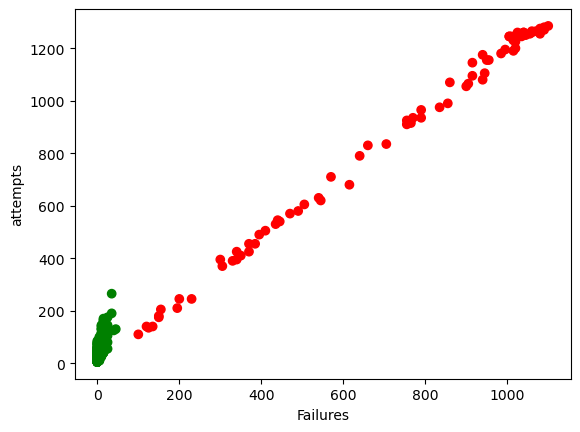

In [22]:
fig, ax = plt.subplots()
ax.scatter(X,Y, c = color)
plt.xlabel("Failures")
plt.ylabel("attempts")
plt.show()

In [23]:
y = mydf["failure_rate"].values.tolist()
print(y)

[0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.8552036199095022, 0.0, 0.13636363636363635, 0.09375, 0.05, 0.18421052631578946, 0.16666666666666666, 0.2, 0.16666666666666666, 0.2, 0.8207547169811321, 0.0, 0.0, 0.2857142857142857, 0.0, 0.2222222222222222, 0.0625, 0.0, 0.0625, 0.14285714285714285, 0.8028169014084507, 0.07692307692307693, 0.11764705882352941, 0.15384615384615385, 0.15384615384615385, 0.07142857142857142, 0.1111111111111111, 0.0, 0.0, 0.16666666666666666, 0.1111111111111111, 0.2, 0.08333333333333333, 0.8296703296703297, 0.21428571428571427, 0.8560311284046692, 0.09090909090909091, 0.11764705882352941, 0.17391304347826086, 0.07142857142857142, 0.1111111111111111, 0.0, 0.16666666666666666, 0.125, 0.3125, 0.16666666666666666, 0.0, 0.3333333333333333, 0.0, 0.1, 0.0, 0.09090909090909091, 0.2, 0.06666666666666667, 0.16666666666666666, 0.0, 0.1, 0.0, 0.05263157894736842, 0.85, 0.1111111111111111, 0.07692307692307693, 0.8112449799196787, 0.0, 0.125, 0.19047619047619047, 0.0, 0.2, 0.0, 0.25, 0.

In [24]:
x = mydf["usernames"].values.tolist()
print(x)

[1, 1, 1, 1, 1, 1, 126, 1, 1, 1, 1, 1, 1, 1, 1, 1, 65, 1, 1, 1, 1, 1, 1, 1, 1, 1, 79, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 103, 1, 140, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 134, 1, 1, 137, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 135, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 15, 1, 1, 44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 41, 108, 1, 70, 1, 1, 1, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 144, 1, 1, 1, 1, 144, 1, 1, 1, 1, 1, 1, 1, 107, 1, 22, 1, 1, 64, 49, 1, 1, 1, 1, 1, 54, 1, 1, 1, 135, 14, 102, 1, 143, 1, 63, 1, 1, 1, 1, 1, 1, 1, 1, 134, 1, 1, 1, 1, 1, 12, 1, 47, 1, 103, 1, 1, 1, 1, 1, 1, 1, 1, 14, 76, 1, 1, 1, 1, 1, 138, 1, 1, 1, 110, 1, 1, 1, 1, 1, 1, 1, 60, 1, 1, 108, 1, 1, 1, 1, 1, 1, 1, 131, 117, 93, 1, 124, 1, 1, 125, 142, 1, 1, 133, 139, 1, 1, 55, 1, 1, 138, 1, 1, 1, 1, 97, 1, 1, 1, 1, 1, 126, 1, 1, 22, 1, 143, 66, 27, 1, 1, 1, 1, 1, 58, 1, 118, 

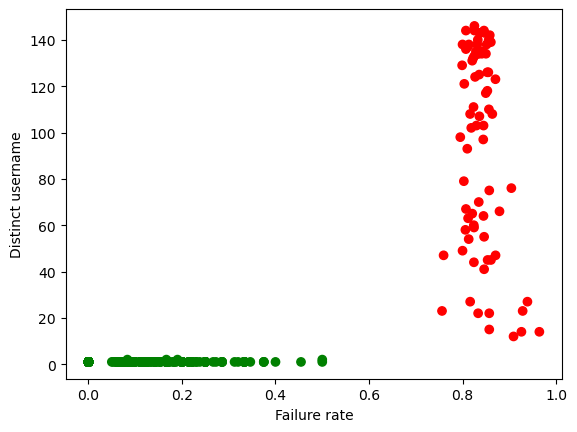

In [25]:
fig, ax = plt.subplots()
ax.scatter(y,x, c = color)
plt.ylabel("Distinct username")
plt.xlabel("Failure rate")
plt.show()

In [26]:
failures = mydf["failures"].values.tolist()
print(failures)

[0, 10, 15, 0, 0, 0, 945, 0, 15, 15, 5, 35, 5, 10, 10, 10, 435, 0, 0, 20, 0, 20, 5, 0, 5, 15, 570, 10, 10, 20, 10, 5, 5, 0, 0, 5, 5, 10, 5, 755, 15, 1100, 5, 10, 20, 5, 5, 0, 5, 5, 25, 5, 0, 10, 0, 5, 0, 5, 10, 5, 15, 0, 5, 0, 5, 1020, 5, 10, 1010, 0, 5, 20, 0, 10, 0, 10, 10, 15, 5, 5, 5, 15, 10, 5, 15, 0, 15, 5, 0, 0, 5, 10, 10, 0, 0, 0, 5, 15, 1040, 15, 0, 5, 45, 25, 25, 5, 5, 5, 5, 0, 5, 25, 15, 10, 0, 10, 10, 10, 10, 5, 120, 0, 10, 305, 5, 5, 0, 5, 0, 5, 10, 0, 5, 0, 25, 10, 0, 0, 5, 5, 0, 20, 15, 5, 5, 5, 5, 5, 15, 350, 330, 755, 5, 505, 0, 5, 10, 0, 10, 5, 15, 5, 5, 230, 5, 20, 10, 1040, 5, 0, 0, 0, 1005, 0, 10, 40, 5, 5, 10, 10, 765, 5, 150, 0, 5, 490, 340, 10, 0, 10, 0, 35, 370, 0, 0, 0, 1055, 135, 790, 5, 1045, 0, 410, 5, 0, 5, 5, 0, 0, 15, 0, 995, 0, 15, 0, 0, 5, 100, 0, 370, 0, 790, 10, 10, 5, 5, 0, 0, 0, 5, 125, 615, 0, 15, 5, 5, 20, 1035, 5, 0, 0, 835, 0, 0, 0, 0, 0, 0, 10, 445, 0, 0, 855, 0, 10, 5, 0, 10, 5, 0, 1030, 905, 640, 0, 955, 0, 0, 915, 1090, 0, 0, 1015, 1080, 0,

In [27]:
failures.sort()
print(failures)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 35, 35, 40, 45, 100, 120, 125, 135, 150, 150, 155, 195, 200, 230, 300, 305, 330, 340, 340, 350, 370, 370, 385, 395, 410, 435, 440, 445, 470, 490, 505, 540, 545, 

In [28]:
allfailuresmedian = failures[int(len(failures)/2)]
print(allfailuresmedian)

5


In [29]:
attempts = mydf["attempts"].values.tolist()
print(attempts)

[20, 40, 60, 45, 35, 75, 1105, 55, 110, 160, 100, 190, 30, 50, 60, 50, 530, 45, 20, 70, 60, 90, 80, 35, 80, 105, 710, 130, 85, 130, 65, 70, 45, 60, 25, 30, 45, 50, 60, 910, 70, 1285, 55, 85, 115, 70, 45, 30, 30, 40, 80, 30, 40, 30, 30, 50, 60, 55, 50, 75, 90, 70, 50, 35, 95, 1200, 45, 130, 1245, 30, 40, 105, 35, 50, 20, 40, 45, 165, 10, 15, 65, 60, 105, 15, 80, 35, 70, 45, 15, 10, 85, 75, 50, 40, 15, 15, 85, 170, 1255, 65, 35, 40, 130, 145, 105, 80, 40, 20, 25, 10, 55, 55, 70, 60, 80, 35, 50, 50, 35, 40, 140, 10, 85, 370, 65, 45, 30, 25, 45, 35, 140, 20, 25, 60, 175, 70, 25, 25, 20, 40, 15, 75, 70, 30, 45, 25, 40, 20, 65, 410, 390, 925, 40, 605, 25, 40, 60, 15, 40, 45, 90, 70, 60, 245, 50, 130, 115, 1260, 35, 45, 20, 35, 1245, 10, 55, 125, 30, 30, 145, 115, 915, 30, 180, 50, 15, 580, 425, 30, 10, 30, 20, 265, 455, 30, 15, 15, 1255, 140, 965, 25, 1250, 30, 505, 20, 30, 45, 30, 75, 10, 40, 25, 1195, 10, 100, 45, 55, 50, 110, 30, 425, 70, 935, 80, 30, 25, 10, 15, 25, 5, 35, 135, 680, 30, 

In [30]:
attempts.sort()
print(attempts)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 55, 55, 55, 55, 55, 55, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 65, 65, 65, 65, 65, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 75, 75, 75, 75, 75, 80, 80, 80, 80, 80, 80, 80, 85, 85, 85, 85, 85, 85, 85, 90, 90, 90, 90, 95, 100, 100, 105, 105, 105, 105, 110, 110, 115, 115, 115, 125, 130, 130, 130, 130, 1

In [31]:
allattemptsmedian = attempts[int(len(attempts)/2)]
print(allattemptsmedian)

50


In [32]:
usernames = mydf["usernames"].values.tolist()
print(usernames)

[1, 1, 1, 1, 1, 1, 126, 1, 1, 1, 1, 1, 1, 1, 1, 1, 65, 1, 1, 1, 1, 1, 1, 1, 1, 1, 79, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 103, 1, 140, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 134, 1, 1, 137, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 135, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 15, 1, 1, 44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 41, 108, 1, 70, 1, 1, 1, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 144, 1, 1, 1, 1, 144, 1, 1, 1, 1, 1, 1, 1, 107, 1, 22, 1, 1, 64, 49, 1, 1, 1, 1, 1, 54, 1, 1, 1, 135, 14, 102, 1, 143, 1, 63, 1, 1, 1, 1, 1, 1, 1, 1, 134, 1, 1, 1, 1, 1, 12, 1, 47, 1, 103, 1, 1, 1, 1, 1, 1, 1, 1, 14, 76, 1, 1, 1, 1, 1, 138, 1, 1, 1, 110, 1, 1, 1, 1, 1, 1, 1, 60, 1, 1, 108, 1, 1, 1, 1, 1, 1, 1, 131, 117, 93, 1, 124, 1, 1, 125, 142, 1, 1, 133, 139, 1, 1, 55, 1, 1, 138, 1, 1, 1, 1, 97, 1, 1, 1, 1, 1, 126, 1, 1, 22, 1, 143, 66, 27, 1, 1, 1, 1, 1, 58, 1, 118, 

In [33]:
usernames.sort()
print(usernames)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 12, 14, 14, 15, 22, 22, 23, 23, 27, 27, 41, 44, 45, 45, 47, 47, 49, 54, 55, 58, 59, 60, 63, 64, 65, 66, 67, 70, 75, 76, 79, 93, 97, 98, 102, 103, 103, 107, 108, 108, 110, 111, 117, 118, 121, 123, 124, 125, 126, 126, 129, 131,

In [34]:
allusernamesmedian = usernames[int(len(usernames)/2)]
print(allusernamesmedian)

1


In [35]:
datetimes = df["datetime"].values.tolist()
print(datetimes)

['2018-12-01 00:23:11.097544', '2018-12-01 00:41:49.098371', '2018-12-01 00:41:50.098371', '2018-12-01 01:02:59.347432', '2018-12-01 01:04:21.404189', '2018-12-01 01:10:11.031665', '2018-12-01 01:19:07.580804', '2018-12-01 01:52:32.449943', '2018-12-01 02:16:13.543327', '2018-12-01 02:17:09.206386', '2018-12-01 02:20:00.201812', '2018-12-01 02:51:10.101921', '2018-12-01 02:54:43.317021', '2018-12-01 02:59:48.825331', '2018-12-01 02:59:49.825331', '2018-12-01 02:59:50.825331', '2018-12-01 02:59:51.825331', '2018-12-01 02:59:52.825331', '2018-12-01 02:59:53.825331', '2018-12-01 02:59:54.825331', '2018-12-01 02:59:55.825331', '2018-12-01 02:59:56.825331', '2018-12-01 02:59:57.825331', '2018-12-01 02:59:58.825331', '2018-12-01 02:59:59.825331', '2018-12-01 03:00:00.825331', '2018-12-01 03:00:01.825331', '2018-12-01 03:00:02.825331', '2018-12-01 03:00:03.825331', '2018-12-01 03:00:04.825331', '2018-12-01 03:00:05.825331', '2018-12-01 03:00:06.825331', '2018-12-01 03:00:07.825331', '2018-12-

In [36]:
datetimes.sort()
print(datetimes)

['2018-12-01 00:23:11.097544', '2018-12-01 00:41:49.098371', '2018-12-01 00:41:50.098371', '2018-12-01 01:02:59.347432', '2018-12-01 01:04:21.404189', '2018-12-01 01:10:11.031665', '2018-12-01 01:19:07.580804', '2018-12-01 01:52:32.449943', '2018-12-01 02:16:13.543327', '2018-12-01 02:17:09.206386', '2018-12-01 02:20:00.201812', '2018-12-01 02:51:10.101921', '2018-12-01 02:54:43.317021', '2018-12-01 02:59:48.825331', '2018-12-01 02:59:49.825331', '2018-12-01 02:59:50.825331', '2018-12-01 02:59:51.825331', '2018-12-01 02:59:52.825331', '2018-12-01 02:59:53.825331', '2018-12-01 02:59:54.825331', '2018-12-01 02:59:55.825331', '2018-12-01 02:59:56.825331', '2018-12-01 02:59:57.825331', '2018-12-01 02:59:58.825331', '2018-12-01 02:59:59.825331', '2018-12-01 03:00:00.825331', '2018-12-01 03:00:01.825331', '2018-12-01 03:00:02.825331', '2018-12-01 03:00:03.825331', '2018-12-01 03:00:04.825331', '2018-12-01 03:00:05.825331', '2018-12-01 03:00:06.825331', '2018-12-01 03:00:07.825331', '2018-12-

In [37]:
firstdatetimes = datetimes[0]
print(firstdatetimes)

2018-12-01 00:23:11.097544


In [38]:
lastdatetimes = datetimes[len(datetimes) - 1]
print(lastdatetimes)


2019-01-01 00:49:10.155441


In [39]:
from datetime import datetime

In [40]:
initialtime = datetime.strptime(firstdatetimes, '%Y-%m-%d %H:%M:%S.%f') 
print(initialtime)

2018-12-01 00:23:11.097544


In [41]:
finaltime = datetime.strptime(lastdatetimes, '%Y-%m-%d %H:%M:%S.%f') 
print(finaltime)

2019-01-01 00:49:10.155441


In [42]:
from datetime import timedelta

In [43]:
delta30m = timedelta(minutes=30)

In [44]:
delta1h = timedelta(hours=1)

In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])
ips = df["source_ip"].drop_duplicates()
hackerips = []

while initialtime + delta1h < finaltime:
    windowinitialtime = initialtime
    windowfinaltime = initialtime + delta1h
    print(windowinitialtime,windowfinaltime)

    data = []
    for ip in ips:
        filtered_df = df[(df["source_ip"] == ip) & (df["datetime"] >= windowinitialtime) & (df["datetime"] <= windowfinaltime)]
        if filtered_df.size < 1:
            continue
        names = filtered_df["username"].drop_duplicates().size
        successes = filtered_df[filtered_df["success"] == True].size
        failures = filtered_df[filtered_df["success"] == False].size
        data.append([ip,names,successes,failures,filtered_df.size,successes/filtered_df.size,failures/filtered_df.size])

    mydf = pd.DataFrame(data, columns = ["source_ip","usernames","successes","failures","attempts","success_rate","failure_rate"])
    if mydf.size > 0:
        for index, row in mydf.iterrows():
            if row["attempts"] * 5 > allattemptsmedian and row["failures"] * 5 > allfailuresmedian:
                hackerips.append(row["source_ip"])
            elif row["usernames"] * 5 > allusernamesmedian:
                hackerips.append(row["source_ip"])

    print(mydf.to_string())
    initialtime = initialtime + delta30m 
hackerips = list(dict.fromkeys(hackerips))
print(hackerips)

2018-12-01 00:23:11.097544 2018-12-01 01:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   75.161.66.106          1         10         0        10           1.0           0.0
1  95.227.178.199          1          5         5        10           0.5           0.5
2   87.170.218.31          1         10         0        10           1.0           0.0
3    51.74.112.23          1          5         0         5           1.0           0.0
2018-12-01 00:53:11.097544 2018-12-01 01:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   75.161.66.106          1          5         0         5           1.0           0.0
1  95.227.178.199          1          5         0         5           1.0           0.0
2   87.170.218.31          1         10         0        10           1.0           0.0
3    51.74.112.23          1          5         0         5           1.0           0.0
2018-12-01 0

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   26.110.13.181          1          5         0         5           1.0           0.0
1  227.153.73.253          1          5         0         5           1.0           0.0
2018-12-01 11:53:11.097544 2018-12-01 12:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   26.110.13.181          1          5         0         5           1.0           0.0
1  239.71.153.181          1          5         0         5           1.0           0.0
2   63.245.107.31          1         10         0        10           1.0           0.0
2018-12-01 12:23:11.097544 2018-12-01 13:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   26.110.13.181          1          5         0         5           1.0           0.0
1  227.153.73.253          1          5         0         5           1.0           0.0
2  239.71.15

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0      7.1.50.97          1          5         0         5           1.0           0.0
1   172.80.75.82          1         10         0        10           1.0           0.0
2  89.81.124.168          1          5         0         5           1.0           0.0
2018-12-02 00:23:11.097544 2018-12-02 01:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0      7.1.50.97          1         15         0        15           1.0           0.0
1  89.81.124.168          1          5         0         5           1.0           0.0
2018-12-02 00:53:11.097544 2018-12-02 01:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0     7.1.50.97          1         10         0        10           1.0           0.0
1  6.115.167.34          1          5         0         5           1.0           0.0
2018-12-02 01:23:11.09754

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  234.222.190.91          1          5         0         5           1.0           0.0
1   97.233.182.38          1          5         0         5           1.0           0.0
2   106.192.149.4          1          5         0         5           1.0           0.0
3   65.198.150.62          1          5         0         5           1.0           0.0
2018-12-02 13:23:11.097544 2018-12-02 14:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  97.233.182.38          1          5         0         5           1.0           0.0
1  65.198.150.62          1          5         0         5           1.0           0.0
2  119.43.95.186          1         10         0        10           1.0           0.0
2018-12-02 13:53:11.097544 2018-12-02 14:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  97.233.182.38 

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   103.112.4.174          1          5         0         5          1.00          0.00
1  144.113.122.33          1          5         0         5          1.00          0.00
2  137.146.98.203        134        180      1020      1200          0.15          0.85
2018-12-03 03:23:11.097544 2018-12-03 04:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   103.112.4.174          1          5         0         5          1.00          0.00
1  137.146.98.203        134        180      1020      1200          0.15          0.85
2018-12-03 03:53:11.097544 2018-12-03 04:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  67.215.153.213          1          5         0         5           1.0           0.0
2018-12-03 04:23:11.097544 2018-12-03 05:23:11.097544
        source_ip  usernames  successes  failu

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    198.119.10.0          1          5         0         5      1.000000      0.000000
1   32.132.80.228          1          5         0         5      1.000000      0.000000
2  166.159.239.25          1         10         5        15      0.666667      0.333333
2018-12-03 16:23:11.097544 2018-12-03 17:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  198.119.10.0          1          5         5        10           0.5           0.5
1  90.126.11.86          1          5         0         5           1.0           0.0
2  17.46.39.218          1          5         0         5           1.0           0.0
2018-12-03 16:53:11.097544 2018-12-03 17:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  198.119.10.0          1          5         5        10           0.5           0.5
1  90.126.11.86         

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   26.110.13.181          1          5         0         5           1.0           0.0
1  227.153.73.253          1          5         5        10           0.5           0.5
2   80.56.196.222          1          5         5        10           0.5           0.5
3    142.89.86.32          1         10         0        10           1.0           0.0
2018-12-04 04:53:11.097544 2018-12-04 05:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   26.110.13.181          1          5         0         5      1.000000      0.000000
1  227.153.73.253          1         10         5        15      0.666667      0.333333
2    142.89.86.32          1         10         0        10      1.000000      0.000000
2018-12-04 05:23:11.097544 2018-12-04 06:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  227.153.7

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   122.72.229.46          1          5         5        10           0.5           0.5
1  115.133.176.83          1          5         5        10           0.5           0.5
2   50.37.169.241          1          5         0         5           1.0           0.0
2018-12-04 18:53:11.097544 2018-12-04 19:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  50.37.169.241          1          5         0         5           1.0           0.0
2018-12-04 19:23:11.097544 2018-12-04 20:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  140.208.72.75          1          5         0         5           1.0           0.0
2018-12-04 19:53:11.097544 2018-12-04 20:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  140.208.72.75          1          5         0   

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   95.227.178.199          1          5         0         5           1.0           0.0
1  218.251.199.112          1         15         0        15           1.0           0.0
2018-12-05 06:53:11.097544 2018-12-05 07:53:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-05 07:23:11.097544 2018-12-05 08:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  180.163.222.54          1          5        10        15      0.333333      0.666667
2018-12-05 07:53:11.097544 2018-12-05 08:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  180.163.222.54          1         10        10        20           0.5           0.5
1   201.20.92.127          1          5         0         5           1.0           0.0
2018-12-05 08:

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  18.246.213.72          1          5         0         5           1.0           0.0
2018-12-05 19:53:11.097544 2018-12-05 20:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  18.246.213.72          1         15         0        15           1.0           0.0
2018-12-05 20:23:11.097544 2018-12-05 21:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  18.246.213.72          1         10         0        10           1.0           0.0
1   11.61.138.20          1          5         0         5           1.0           0.0
2018-12-05 20:53:11.097544 2018-12-05 21:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    11.61.138.20          1          5         0         5           1.0           0.0
1  227.52.129.181          1         10         0    

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  149.226.190.70          1          5         0         5           1.0           0.0
1   67.165.53.177          1         10        10        20           0.5           0.5
2018-12-06 08:53:11.097544 2018-12-06 09:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  67.165.53.177          1         15        10        25           0.6           0.4
2018-12-06 09:23:11.097544 2018-12-06 10:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   202.3.184.21          1          5         0         5           1.0           0.0
1  67.165.53.177          1          5         0         5           1.0           0.0
2018-12-06 09:53:11.097544 2018-12-06 10:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  202.3.184.21          1         10         0      

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   156.30.83.64          1         10         0        10      1.000000      0.000000
1   68.246.23.22          1          5         0         5      1.000000      0.000000
2  132.9.183.215         45         60       350       410      0.146341      0.853659
2018-12-06 21:53:11.097544 2018-12-06 22:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  68.246.23.22          1          5         0         5           1.0           0.0
2018-12-06 22:23:11.097544 2018-12-06 23:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-06 22:53:11.097544 2018-12-06 23:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  180.115.83.215          1         15         0        15           1.0           0.0
2018-12-06 23:23:11.09754

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  200.141.120.110          1          5         0         5           1.0           0.0
2018-12-07 10:53:11.097544 2018-12-07 11:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  200.141.120.110          1          5         0         5           1.0           0.0
2018-12-07 11:23:11.097544 2018-12-07 12:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  200.141.120.110          1          5         0         5           1.0           0.0
1    196.251.56.30          1          5         5        10           0.5           0.5
2018-12-07 11:53:11.097544 2018-12-07 12:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  200.141.120.110          1          5         0         5           1.0           0.0
1    196.251.56.30          1        

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  174.192.13.18          1          5         0         5      1.000000      0.000000
1   86.40.218.53          1         10         5        15      0.666667      0.333333
2  193.185.60.69          1          5         0         5      1.000000      0.000000
3   84.242.78.48         57        100       350       450      0.222222      0.777778
2018-12-07 23:23:11.097544 2018-12-08 00:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  84.242.78.48        144        240      1005      1245      0.192771      0.807229
2018-12-07 23:53:11.097544 2018-12-08 00:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    84.242.78.48         89        140       655       795      0.176101      0.823899
1  233.202.61.206          1          5         0         5      1.000000      0.000000
2018-12-08 00:23:11.0

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  200.141.120.110          1          5         0         5           1.0           0.0
2018-12-08 11:53:11.097544 2018-12-08 12:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  200.141.120.110          1         20         0        20      1.000000      0.000000
1   162.74.135.154         64         90       490       580      0.155172      0.844828
2018-12-08 12:23:11.097544 2018-12-08 13:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   53.218.180.231          1         10         0        10      1.000000      0.000000
1  200.141.120.110          1         20         0        20      1.000000      0.000000
2   162.74.135.154         64         90       490       580      0.155172      0.844828
2018-12-08 12:53:11.097544 2018-12-08 13:53:11.097544
         source_ip  usernames  succes

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  122.72.229.46          1          5         0         5           1.0           0.0
1  174.192.13.18          1          5         0         5           1.0           0.0
2  86.183.39.209          1          5         0         5           1.0           0.0
2018-12-09 01:53:11.097544 2018-12-09 02:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   122.72.229.46          1          5         0         5      1.000000      0.000000
1   174.192.13.18          1          5         0         5      1.000000      0.000000
2   86.183.39.209          1          5         0         5      1.000000      0.000000
3  27.225.181.130          1          5         0         5      1.000000      0.000000
4   192.76.127.61        135        200      1055      1255      0.159363      0.840637
2018-12-09 02:23:11.097544 2018-12-09 03:23:11.097544
        source_i

      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  51.241.77.10          1         10         0        10           1.0           0.0
2018-12-09 13:23:11.097544 2018-12-09 14:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  81.170.69.243          1          5         0         5           1.0           0.0
1   51.241.77.10          1         10         0        10           1.0           0.0
2018-12-09 13:53:11.097544 2018-12-09 14:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  81.170.69.243          1         20         0        20      1.000000      0.000000
1    29.42.175.1          1         10         5        15      0.666667      0.333333
2   51.241.77.10          1         15         0        15      1.000000      0.000000
2018-12-09 14:23:11.097544 2018-12-09 15:23:11.097544
       source_ip  usernames  successes  failures  attempt

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  161.127.175.225          1         10         0        10           1.0           0.0
2018-12-10 02:23:11.097544 2018-12-10 03:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-10 02:53:11.097544 2018-12-10 03:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  63.61.195.205          1          5         0         5           1.0           0.0
2018-12-10 03:23:11.097544 2018-12-10 04:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    63.61.195.205          1         20         0        20           1.0           0.0
1  102.133.183.240          1          5         0         5           1.0           0.0
2018-12-10 03:53:11.097544 2018-12-10 04:53:11.097544
         source_ip  usernames  successes  failur

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  159.145.6.219          1          5         0         5           1.0           0.0
2018-12-10 15:53:11.097544 2018-12-10 16:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  159.145.6.219          1          5         0         5           1.0           0.0
2018-12-10 16:23:11.097544 2018-12-10 17:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-10 16:53:11.097544 2018-12-10 17:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  158.232.211.92          1          5         0         5           1.0           0.0
2018-12-10 17:23:11.097544 2018-12-10 18:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  158.232.211.92          1          5         0      

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   183.50.241.16          1         10         5        15      0.666667      0.333333
1   41.77.180.210          1          5         5        10      0.500000      0.500000
2  180.115.83.215          1          5         0         5      1.000000      0.000000
2018-12-11 06:23:11.097544 2018-12-11 07:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  23.143.69.122          1          5         0         5           1.0           0.0
1  183.50.241.16          1          5         5        10           0.5           0.5
2018-12-11 06:53:11.097544 2018-12-11 07:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   23.143.69.122          1          5         0         5           1.0           0.0
1  67.158.198.212          1          5         0         5           1.0           0.0
2018-12-11 07:2

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  110.117.47.215          1         10         5        15      0.666667      0.333333
2018-12-11 18:53:11.097544 2018-12-11 19:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   88.119.152.44          1         15         5        20      0.750000      0.250000
1  110.117.47.215          1         10         5        15      0.666667      0.333333
2018-12-11 19:23:11.097544 2018-12-11 20:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  88.119.152.44          1         15         5        20          0.75          0.25
2018-12-11 19:53:11.097544 2018-12-11 20:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  103.112.4.174          1         10         0        10           1.0           0.0
2018-12-11 20:23:11.097544 2018-12-11 21:23:11.097

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  145.180.210.234          1          5         0         5          1.00          0.00
1  130.243.110.172          1          5         0         5          1.00          0.00
2   27.220.232.250          1          5         5        10          0.50          0.50
3   53.218.180.231          1         15         5        20          0.75          0.25
2018-12-12 08:53:11.097544 2018-12-12 09:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  145.180.210.234          1         10         0        10      1.000000      0.000000
1  130.243.110.172          1         15         5        20      0.750000      0.250000
2   27.220.232.250          1         10         5        15      0.666667      0.333333
2018-12-12 09:23:11.097544 2018-12-12 10:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0 

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  133.167.129.132          1          5         0         5           1.0           0.0
2018-12-12 19:23:11.097544 2018-12-12 20:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  198.92.176.42          1          5         0         5           1.0           0.0
2018-12-12 19:53:11.097544 2018-12-12 20:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  198.92.176.42          1         10         0        10           1.0           0.0
1  177.58.79.142          1          5         5        10           0.5           0.5
2018-12-12 20:23:11.097544 2018-12-12 21:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    198.92.176.42          1         10         0        10      1.000000      0.000000
1     7.167.187.12          1          5       

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  52.43.163.165          1          5         0         5           1.0           0.0
1     9.12.165.1          1         15         0        15           1.0           0.0
2018-12-13 06:23:11.097544 2018-12-13 07:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  115.133.176.83          1          5         0         5           1.0           0.0
1      9.12.165.1          1         15         0        15           1.0           0.0
2018-12-13 06:53:11.097544 2018-12-13 07:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    156.8.182.29          1         10         0        10           1.0           0.0
1  115.133.176.83          1          5         0         5           1.0           0.0
2018-12-13 07:23:11.097544 2018-12-13 08:23:11.097544
        source_ip  usernames  successes  failures

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.219.113.203          1         10         0        10           1.0           0.0
1  51.181.222.161          1          5         0         5           1.0           0.0
2     31.7.47.204          1          5         0         5           1.0           0.0
2018-12-13 18:53:11.097544 2018-12-13 19:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.219.113.203          1         15         0        15           1.0           0.0
2018-12-13 19:23:11.097544 2018-12-13 20:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.219.113.203          1          5         0         5           1.0           0.0
1  43.127.227.189          1          5         0         5           1.0           0.0
2  72.216.152.181          1          5         0         5           1.0           0.0
2018-12-13 1

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  67.215.153.213          1         15         5        20          0.75          0.25
1   177.58.79.142          1         20         0        20          1.00          0.00
2   190.214.23.67          1          5         0         5          1.00          0.00
2018-12-14 09:23:11.097544 2018-12-14 10:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   63.61.195.205          1         10         0        10           1.0           0.0
1  67.215.153.213          1         10         0        10           1.0           0.0
2   177.58.79.142          1          5         0         5           1.0           0.0
2018-12-14 09:53:11.097544 2018-12-14 10:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  63.61.195.205          1         15         0        15           1.0           0.0
2018-12-14 10:

      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  68.246.23.22          1         10         5        15      0.666667      0.333333
2018-12-14 21:23:11.097544 2018-12-14 22:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  68.246.23.22          1         10         5        15      0.666667      0.333333
2018-12-14 21:53:11.097544 2018-12-14 22:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  156.30.83.64          1          5         0         5           1.0           0.0
2018-12-14 22:23:11.097544 2018-12-14 23:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   50.201.148.229          1          5         5        10           0.5           0.5
1     156.30.83.64          1          5         0         5           1.0           0.0
2  157.167.119.191          1          5         0     

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    156.8.182.29          1          5         0         5           1.0           0.0
1  115.133.176.83          1          5         0         5           1.0           0.0
2   77.180.11.251          1          5         0         5           1.0           0.0
2018-12-15 11:23:11.097544 2018-12-15 12:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    156.8.182.29          1          5         0         5           1.0           0.0
1  115.133.176.83          1          5         0         5           1.0           0.0
2  169.196.86.169          1          5         5        10           0.5           0.5
3  215.222.75.229          1          5         0         5           1.0           0.0
2018-12-15 11:53:11.097544 2018-12-15 12:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    156.8.1

      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  202.3.184.21          1          5         0         5           1.0           0.0
1   200.5.34.41          1         15         0        15           1.0           0.0
2018-12-15 22:53:11.097544 2018-12-15 23:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  202.3.184.21          1         10         0        10           1.0           0.0
1   200.5.34.41          1         20         0        20           1.0           0.0
2018-12-15 23:23:11.097544 2018-12-16 00:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  202.3.184.21          1         10         0        10           1.0           0.0
1   200.5.34.41          1          5         0         5           1.0           0.0
2  7.229.169.82          1          5         0         5           1.0           0.0
2018-12-15 23:53:11.097544 2018-

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   159.145.6.219          1          5         0         5           1.0           0.0
1  239.172.63.151          1          5         0         5           1.0           0.0
2   96.19.200.227          1          5         0         5           1.0           0.0
2018-12-16 12:23:11.097544 2018-12-16 13:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-16 12:53:11.097544 2018-12-16 13:53:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-16 13:23:11.097544 2018-12-16 14:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-16 13:53:11.097544 2018-12-16 14:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   179.223.92.31          1          5         0         5           1.0           0.0
1   35.113.36.154          1         10         0        10           1.0           0.0
2   11.217.51.133          1         10         0        10           1.0           0.0
3  234.120.182.83          1         10         0        10           1.0           0.0
2018-12-17 04:23:11.097544 2018-12-17 05:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   35.113.36.154          1          5         0         5           1.0           0.0
1  77.138.170.172          1         10         0        10           1.0           0.0
2  234.120.182.83          1         10         0        10           1.0           0.0
3   45.183.149.77          1         10         0        10           1.0           0.0
2018-12-17 04:53:11.097544 2018-12-17 05:53:11.097544
        sour

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  18.246.213.72          1         20         0        20      1.000000      0.000000
1   56.141.61.91        133        215      1015      1230      0.174797      0.825203
2018-12-17 17:23:11.097544 2018-12-17 18:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   90.126.11.86          1         10         5        15      0.666667      0.333333
1  18.246.213.72          1         15         0        15      1.000000      0.000000
2018-12-17 17:53:11.097544 2018-12-17 18:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  90.126.11.86          1         15         5        20          0.75          0.25
2018-12-17 18:23:11.097544 2018-12-17 19:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  90.126.11.86          1          5         0         5 

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  41.89.135.103          1          5         5        10           0.5           0.5
1  193.185.77.53          1         15         0        15           1.0           0.0
2018-12-18 06:53:11.097544 2018-12-18 07:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    198.92.176.42          1          5         0         5           1.0           0.0
1  133.167.129.132          1          5         0         5           1.0           0.0
2    153.212.55.50          1         10         0        10           1.0           0.0
2018-12-18 07:23:11.097544 2018-12-18 08:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    198.92.176.42          1         15         0        15           1.0           0.0
1  133.167.129.132          1          5         0         5           1.0           0.0
2    153

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  143.132.162.175          1          5         0         5           1.0           0.0
1    201.7.159.147          1          5         0         5           1.0           0.0
2     18.8.157.239        138        235       940      1175           0.2           0.8
2018-12-18 18:23:11.097544 2018-12-18 19:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  18.8.157.239         96        150       670       820      0.182927      0.817073
2018-12-18 18:53:11.097544 2018-12-18 19:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  123.148.94.96          1          5         0         5           1.0           0.0
2018-12-18 19:23:11.097544 2018-12-18 20:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  123.148.94.96          1          5         0 

Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-19 05:23:11.097544 2018-12-19 06:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  161.127.175.225          1          5         0         5           1.0           0.0
2018-12-19 05:53:11.097544 2018-12-19 06:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0      221.72.3.79          1          5         0         5           1.0           0.0
1  161.127.175.225          1          5         0         5           1.0           0.0
2018-12-19 06:23:11.097544 2018-12-19 07:23:11.097544
     source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  221.72.3.79          1         20         5        25           0.8           0.2
2018-12-19 06:53:11.097544 2018-12-19 07:53:11.097544
       source_ip  usernames  successes  failures  at

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    7.229.169.82          1          5         0         5      1.000000      0.000000
1  76.235.190.195          1         10         0        10      1.000000      0.000000
2  65.170.106.102         97        130       705       835      0.155689      0.844311
2018-12-19 18:53:11.097544 2018-12-19 19:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    7.229.169.82          1          5         0         5      1.000000      0.000000
1  169.196.86.169          1         10         0        10      1.000000      0.000000
2  215.222.75.229          1         10         5        15      0.666667      0.333333
3  65.170.106.102         79        110       570       680      0.161765      0.838235
2018-12-19 19:23:11.097544 2018-12-19 20:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  169.196.8

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  41.163.250.55          1          5         0         5           1.0           0.0
1   7.229.169.82          1          5         0         5           1.0           0.0
2018-12-20 06:23:11.097544 2018-12-20 07:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  122.72.229.46          1          5         0         5           1.0           0.0
1   186.70.197.6          1          5         0         5           1.0           0.0
2018-12-20 06:53:11.097544 2018-12-20 07:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  122.72.229.46          1          5         0         5      1.000000      0.000000
1    83.2.199.88          1         10         5        15      0.666667      0.333333
2   186.70.197.6          1          5         0         5      1.000000      0.000000
2018-12-20 07:23:11.09

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  177.58.79.142          1         10        10        20           0.5           0.5
1  190.214.23.67          1         10         0        10           1.0           0.0
2018-12-20 17:53:11.097544 2018-12-20 18:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  177.58.79.142          1         10        10        20           0.5           0.5
1  190.214.23.67          1         15         0        15           1.0           0.0
2018-12-20 18:23:11.097544 2018-12-20 19:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    7.229.169.82          1          5         0         5           1.0           0.0
1  76.235.190.195          1          5         5        10           0.5           0.5
2   177.58.79.142          1          5         0         5           1.0           0.0
3   190.214.23.67 

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  147.97.53.222          1          5         0         5           1.0           0.0
2018-12-21 04:53:11.097544 2018-12-21 05:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  147.97.53.222          1         10         0        10           1.0           0.0
2018-12-21 05:23:11.097544 2018-12-21 06:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  147.97.53.222          1         10         0        10           1.0           0.0
2018-12-21 05:53:11.097544 2018-12-21 06:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  147.97.53.222          1         15         0        15           1.0           0.0
2018-12-21 06:23:11.097544 2018-12-21 07:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  236.44.247.104          1          5         0         5           1.0           0.0
2018-12-21 16:23:11.097544 2018-12-21 17:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  214.23.84.228          1          5         0         5           1.0           0.0
2018-12-21 16:53:11.097544 2018-12-21 17:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.132.80.228          1          5         0         5           1.0           0.0
1  214.23.84.228          1          5         0         5           1.0           0.0
2018-12-21 17:23:11.097544 2018-12-21 18:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.132.80.228          1          5         0         5           1.0           0.0
1  233.79.229.78          1          5         0     

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  18.246.213.72          1          5         0         5           1.0           0.0
2018-12-22 05:53:11.097544 2018-12-22 06:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   4.209.135.236          1          5         0         5           1.0           0.0
1  90.168.209.195          1          5         5        10           0.5           0.5
2018-12-22 06:23:11.097544 2018-12-22 07:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   4.209.135.236          1          5         0         5           1.0           0.0
1   18.246.213.72          1          5         0         5           1.0           0.0
2  90.168.209.195          1          5         5        10           0.5           0.5
3  211.109.225.39          1          5         0         5           1.0           0.0
2018-12-22 06:

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0     230.51.96.84          1          5         0         5           1.0           0.0
1  139.129.223.182          1          5         0         5           1.0           0.0
2018-12-22 19:53:11.097544 2018-12-22 20:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0     230.51.96.84          1         10         0        10           1.0           0.0
1  139.129.223.182          1          5         0         5           1.0           0.0
2   225.33.218.202          1          5         0         5           1.0           0.0
2018-12-22 20:23:11.097544 2018-12-22 21:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    230.51.96.84          1          5         0         5           1.0           0.0
1  225.33.218.202          1          5         0         5           1.0           0.0
2018-

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  180.189.212.152         58         95       395       490      0.193878      0.806122
1   208.196.196.31          1          5         0         5      1.000000      0.000000
2018-12-23 08:53:11.097544 2018-12-23 09:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  180.189.212.152         58         95       395       490      0.193878      0.806122
1   208.196.196.31          1          5         0         5      1.000000      0.000000
2018-12-23 09:23:11.097544 2018-12-23 10:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   119.43.95.186          1         10         0        10           1.0           0.0
1  101.154.143.93          1          5         5        10           0.5           0.5
2018-12-23 09:53:11.097544 2018-12-23 10:53:11.097544
        source_ip  usernames  successes 

      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  186.70.197.6          1          5         0         5       1.00000       0.00000
1  81.46.96.118        144        195      1070      1265       0.15415       0.84585
2018-12-23 19:53:11.097544 2018-12-23 20:53:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  145.180.210.234          1          5         0         5      1.000000      0.000000
1     81.46.96.118        124        170       910      1080      0.157407      0.842593
2    12.225.77.109        121        210       860      1070      0.196262      0.803738
2018-12-23 20:23:11.097544 2018-12-23 21:23:11.097544
         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  145.180.210.234          1          5         0         5      1.000000      0.000000
1     80.192.75.64          1          5         0         5      1.000000      0.000000
2    12.225

         source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  135.139.207.160         59        100       470       570      0.175439      0.824561
2018-12-24 09:23:11.097544 2018-12-24 10:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  179.223.92.31          1          5         0         5           1.0           0.0
2018-12-24 09:53:11.097544 2018-12-24 10:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  179.223.92.31          1         10         0        10           1.0           0.0
2018-12-24 10:23:11.097544 2018-12-24 11:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  179.223.92.31          1          5         0         5           1.0           0.0
1   142.89.86.32          1          5         0         5           1.0           0.0
2  62.209.199.87          1          5         0   

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    156.30.83.64          1          5         0         5           1.0           0.0
1    68.246.23.22          1          5         0         5           1.0           0.0
2  13.183.250.233          1          5         0         5           1.0           0.0
2018-12-24 21:23:11.097544 2018-12-24 22:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    156.30.83.64          1          5         0         5           1.0           0.0
1    68.246.23.22          1         15         0        15           1.0           0.0
2  126.232.174.72          1          5         5        10           0.5           0.5
3  13.183.250.233          1         10         0        10           1.0           0.0
2018-12-24 21:53:11.097544 2018-12-24 22:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    68.246.

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  6.165.233.253          1          5         0         5           1.0           0.0
2018-12-25 10:53:11.097544 2018-12-25 11:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  6.165.233.253          1         10         0        10           1.0           0.0
2018-12-25 11:23:11.097544 2018-12-25 12:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   6.165.233.253          1          5         0         5      1.000000      0.000000
1  175.128.60.226          1         30         5        35      0.857143      0.142857
2018-12-25 11:53:11.097544 2018-12-25 12:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  175.128.60.226          1         45         5        50           0.9           0.1
2018-12-25 12:23:11.097544 2018-12-25 13:23:11.097

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  227.153.73.253          1         15         0        15      1.000000      0.000000
1  239.71.153.181          1          5         0         5      1.000000      0.000000
2   39.69.105.254          1          5         0         5      1.000000      0.000000
3  196.180.67.255          1          5         0         5      1.000000      0.000000
4    76.56.223.40        135        205      1060      1265      0.162055      0.837945
2018-12-25 23:53:11.097544 2018-12-26 00:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   26.110.13.181          1          5         0         5      1.000000      0.000000
1  227.153.73.253          1          5         0         5      1.000000      0.000000
2  239.71.153.181          1          5         0         5      1.000000      0.000000
3    76.56.223.40         71         95       540       635      0

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   77.180.11.251          1          5         0         5      1.000000      0.000000
1  119.160.142.90        138        190      1090      1280      0.148438      0.851562
2018-12-26 11:53:11.097544 2018-12-26 12:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  77.180.11.251          1         15         0        15           1.0           0.0
2018-12-26 12:23:11.097544 2018-12-26 13:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  77.180.11.251          1         10         0        10           1.0           0.0
2018-12-26 12:53:11.097544 2018-12-26 13:53:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-26 13:23:11.097544 2018-12-26 14:23:11.097544
        source_ip  usernames  successes  failures  atte

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   162.11.93.64          1          5         0         5           1.0           0.0
1  193.185.60.69          1          5         0         5           1.0           0.0
2018-12-27 02:23:11.097544 2018-12-27 03:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   150.241.46.94          1          5         0         5      1.000000      0.000000
1    162.11.93.64          1          5         0         5      1.000000      0.000000
2   193.185.60.69          1         10         0        10      1.000000      0.000000
3  141.78.182.137         23         50       155       205      0.243902      0.756098
2018-12-27 02:53:11.097544 2018-12-27 03:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   150.241.46.94          1         10         0        10      1.000000      0.000000
1    162.11.93.

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  161.124.121.94          1          5         0         5           1.0           0.0
2018-12-27 14:23:11.097544 2018-12-27 15:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  233.79.229.78          1          5         0         5           1.0           0.0
2018-12-27 14:53:11.097544 2018-12-27 15:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  233.79.229.78          1          5         0         5           1.0           0.0
1  36.98.233.122          1          5         0         5           1.0           0.0
2018-12-27 15:23:11.097544 2018-12-27 16:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  36.98.233.122          1          5         0         5           1.0           0.0
2018-12-27 15:53:11.097544 2018-12-27 16:53:11.097544

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  123.144.168.87          1         20         0        20           1.0           0.0
2018-12-28 05:23:11.097544 2018-12-28 06:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  123.144.168.87          1         15         0        15           1.0           0.0
2018-12-28 05:53:11.097544 2018-12-28 06:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  123.144.168.87          1         20         0        20           1.0           0.0
2018-12-28 06:23:11.097544 2018-12-28 07:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  123.144.168.87          1         20         0        20           1.0           0.0
1   81.170.69.243          1          5         0         5           1.0           0.0
2  112.133.85.220          1          5       

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  177.58.79.142          1          5         0         5           1.0           0.0
2018-12-28 19:23:11.097544 2018-12-28 20:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  196.251.56.30          1          5         0         5           1.0           0.0
1  177.58.79.142          1         15         0        15           1.0           0.0
2018-12-28 19:53:11.097544 2018-12-28 20:53:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  196.251.56.30          1         10         0        10           1.0           0.0
1  177.58.79.142          1         10         0        10           1.0           0.0
2018-12-28 20:23:11.097544 2018-12-28 21:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  196.251.56.30          1          5         0       

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  169.196.86.169          1          5         5        10           0.5           0.5
2018-12-29 09:53:11.097544 2018-12-29 10:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  169.196.86.169          1          5         5        10           0.5           0.5
1   202.66.150.58          1          5         0         5           1.0           0.0
2018-12-29 10:23:11.097544 2018-12-29 11:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  203.131.106.21          1          5         5        10           0.5           0.5
1   202.66.150.58          1         10         0        10           1.0           0.0
2018-12-29 10:53:11.097544 2018-12-29 11:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  203.131.106.21          1          5       

Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-29 22:23:11.097544 2018-12-29 23:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-29 22:53:11.097544 2018-12-29 23:53:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-29 23:23:11.097544 2018-12-30 00:23:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-29 23:53:11.097544 2018-12-30 00:53:11.097544
Empty DataFrame
Columns: [source_ip, usernames, successes, failures, attempts, success_rate, failure_rate]
Index: []
2018-12-30 00:23:11.097544 2018-12-30 01:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  15.254.166.129          1          5         0        

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   19.90.17.161          1          5         0         5      1.000000      0.000000
1  36.98.233.122          1          5         0         5      1.000000      0.000000
2  77.71.210.255        134        195       985      1180      0.165254      0.834746
2018-12-30 11:53:11.097544 2018-12-30 12:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  19.90.17.161          1          5         0         5           1.0           0.0
2018-12-30 12:23:11.097544 2018-12-30 13:23:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.219.113.203          1         15         0        15           1.0           0.0
2018-12-30 12:53:11.097544 2018-12-30 13:53:11.097544
        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  32.219.113.203          1         20         5     

        source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0    12.119.72.95          1          5         0         5       1.00000       0.00000
1    73.106.1.104          1         10         0        10       1.00000       0.00000
2    7.229.169.82          1          5         5        10       0.50000       0.50000
3  159.56.224.130        134        200      1060      1260       0.15873       0.84127
2018-12-31 02:53:11.097544 2018-12-31 03:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  12.119.72.95          1          5         0         5           1.0           0.0
1  73.106.1.104          1         10         0        10           1.0           0.0
2  63.3.150.188          1          5         0         5           1.0           0.0
2018-12-31 03:23:11.097544 2018-12-31 04:23:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0  94.41.52.157       

       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   183.58.32.14          1          5         0         5           1.0           0.0
1   156.8.182.29          1          5         0         5           1.0           0.0
2  77.180.11.251          1          5         0         5           1.0           0.0
2018-12-31 14:23:11.097544 2018-12-31 15:23:11.097544
       source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   156.8.182.29          1          5         0         5      1.000000      0.000000
1    45.66.76.19          1          5         0         5      1.000000      0.000000
2  77.180.11.251          1          5         0         5      1.000000      0.000000
3   51.27.13.128         23         15       195       210      0.071429      0.928571
2018-12-31 14:53:11.097544 2018-12-31 15:53:11.097544
      source_ip  usernames  successes  failures  attempts  success_rate  failure_rate
0   45.66.76.19        

In [46]:
print("hackerips", hackerips)

hackerips ['75.161.66.106', '95.227.178.199', '87.170.218.31', '51.74.112.23', '218.251.199.112', '198.92.176.42', '22.64.52.205', '26.110.13.181', '227.153.73.253', '21.20.105.132', '239.71.153.181', '63.61.195.205', '33.115.66.20', '145.180.210.234', '130.243.110.172', '27.220.232.250', '88.55.2.156', '52.43.163.165', '31.159.199.26', '233.166.130.14', '63.245.107.31', '50.201.148.229', '156.30.83.64', '100.43.18.36', '68.246.23.22', '111.152.58.154', '165.230.10.86', '150.241.46.94', '169.4.26.79', '32.219.113.203', '164.225.104.190', '7.167.187.12', '66.202.79.90', '7.1.50.97', '172.80.75.82', '89.81.124.168', '6.115.167.34', '31.176.216.69', '159.145.6.219', '120.238.96.119', '143.132.162.175', '77.195.252.66', '41.89.135.103', '179.223.92.31', '88.119.152.44', '133.167.129.132', '4.209.135.236', '39.69.105.254', '196.180.67.255', '31.12.123.23', '185.149.150.165', '234.222.190.91', '97.233.182.38', '106.192.149.4', '65.198.150.62', '119.43.95.186', '161.124.121.94', '101.113.31.1

In [47]:
print("Number of IPs considered as hackers:",len( hackerips))

Number of IPs considered as hackers: 335


In [48]:
adf = pd.read_csv('logs/dec_2018_attacks.csv')
print(adf.to_string())

                         start                         end        source_ip
0   2018-12-01 02:59:47.825331  2018-12-01 03:03:28.825331     22.64.52.205
1   2018-12-01 09:48:44.833872  2018-12-01 09:50:30.833872      88.55.2.156
2   2018-12-01 18:17:17.328128  2018-12-01 18:19:39.328128    165.230.10.86
3   2018-12-02 03:01:47.695193  2018-12-02 03:04:49.695193   120.238.96.119
4   2018-12-02 04:40:40.605517  2018-12-02 04:44:57.605517    77.195.252.66
5   2018-12-03 03:42:50.812476  2018-12-03 03:46:50.812476   137.146.98.203
6   2018-12-03 06:58:29.130102  2018-12-03 07:02:38.130102     104.14.16.33
7   2018-12-03 15:38:02.757783  2018-12-03 15:38:04.757783   203.169.15.211
8   2018-12-04 08:54:35.511358  2018-12-04 08:58:46.511358    161.0.204.113
9   2018-12-05 11:19:54.655985  2018-12-05 11:20:22.655985  206.196.247.152
10  2018-12-05 12:33:58.806420  2018-12-05 12:35:12.806420   116.44.105.206
11  2018-12-06 21:46:52.985600  2018-12-06 21:48:14.985600    132.9.183.215
12  2018-12-

In [49]:
attackips = adf["source_ip"].values.tolist()
print(attackips)

['22.64.52.205', '88.55.2.156', '165.230.10.86', '120.238.96.119', '77.195.252.66', '137.146.98.203', '104.14.16.33', '203.169.15.211', '161.0.204.113', '206.196.247.152', '116.44.105.206', '132.9.183.215', '39.32.114.228', '118.73.99.189', '119.151.13.157', '196.53.192.251', '21.244.53.228', '84.242.78.48', '51.182.196.37', '119.60.251.145', '162.74.135.154', '1.54.45.23', '182.74.58.156', '192.76.127.61', '131.216.201.37', '59.203.200.128', '33.143.136.164', '136.183.55.115', '34.246.24.196', '146.85.192.20', '190.202.141.200', '192.232.167.35', '198.35.151.184', '43.202.236.174', '174.133.18.87', '108.82.188.144', '161.102.222.141', '53.51.20.204', '119.107.119.170', '119.42.109.164', '211.76.125.192', '132.96.233.156', '30.252.62.154', '88.95.243.174', '56.141.61.91', '150.135.171.76', '56.128.36.55', '18.8.157.239', '65.170.106.102', '141.248.7.75', '47.131.244.25', '106.52.16.184', '121.12.88.210', '228.147.197.19', '180.189.212.152', '217.36.186.68', '81.46.96.118', '12.225.77.1

In [50]:
tp = []
fn =[]
fp=[]
tn=[]
for ip in attackips:
    if ip in hackerips:
        tp.append(ip)
    else:
        fn.append(ip)
for ip in hackerips:
    if ip not in attackips:
        fp.append(ip)
for ip in ips:
    if ip not in tp and ip not in fn and ip not in fp:
        tn.append(ip)
        
print("True Positive",tp)
print("False negative",fn)
print("False positive",fp)
print("True negative",tn)

True Positive ['22.64.52.205', '88.55.2.156', '165.230.10.86', '120.238.96.119', '77.195.252.66', '137.146.98.203', '104.14.16.33', '203.169.15.211', '161.0.204.113', '206.196.247.152', '116.44.105.206', '132.9.183.215', '39.32.114.228', '118.73.99.189', '119.151.13.157', '196.53.192.251', '21.244.53.228', '84.242.78.48', '51.182.196.37', '119.60.251.145', '162.74.135.154', '1.54.45.23', '182.74.58.156', '192.76.127.61', '131.216.201.37', '59.203.200.128', '33.143.136.164', '136.183.55.115', '34.246.24.196', '146.85.192.20', '190.202.141.200', '192.232.167.35', '198.35.151.184', '43.202.236.174', '174.133.18.87', '108.82.188.144', '161.102.222.141', '53.51.20.204', '119.107.119.170', '119.42.109.164', '211.76.125.192', '132.96.233.156', '30.252.62.154', '88.95.243.174', '56.141.61.91', '150.135.171.76', '56.128.36.55', '18.8.157.239', '65.170.106.102', '141.248.7.75', '47.131.244.25', '106.52.16.184', '121.12.88.210', '228.147.197.19', '180.189.212.152', '217.36.186.68', '81.46.96.118'

In [63]:
if not (len(fp)+len(tn)) == 0:
        print("False Positive Rate",len(fp)/(len(fp)+len(tn)))
else:            
        print("could not calculate")
            
if not (len(fp)+len(tp)) == 0:
        print("False Discovery Rate",len(fp)/(len(fp)+len(tp)))
else:
        print("could not calculate")
        
if not (len(fn)+len(tp)) == 0:
        print("False Negative Rate",len(fn)/(len(fn)+len(tp)))
else:
        print("could not calculate")
        
if not (len(fn)+len(tn)) == 0:
        print("False Omission Rate",len(fn)/(len(fn)+len(tn)))
else:
        print("could not calculate")

False Positive Rate 1.0
False Discovery Rate 0.7671641791044777
False Negative Rate 0.0
could not calculate
